Load and process data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [4]:
# Preview data
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [5]:
# Change the maximum number of columns to print a preview
pd.options.display.max_columns = 40

In [6]:
data.info()
# 2, "age" : oneself age
# 3, "age_o" : partner's age
# 33, "expected_happy_with_sd_people" : expectation of satisfaction with speed dating partner
# 34, "expected_num_interested_in_me" : expectation of the number of people who are interested in me
# 35, "like" : my preference
# 36, "guess_prob_liked" : expectation of propability how much my parter likes me
# 37, "met" : check if me and my partner have met before a speed dating

# pref_o_xxx: how partner think xxx is important
# xxx_o: how my partner think I am xxx
# xxx_important: how I think xxx is important
# xxx_partner: how I think my partner is xxx

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [7]:
# statistical information
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


Preprocessing: Handling Missing Values

In [8]:
# missing data process
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


In [9]:
# drop missing data related to importance, which will be used for
# the importance * score calculation
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
                           'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

In [10]:
# fill the remained missing data as -99 (unrealistic value)
data = data.fillna(-99)

Preprocessing: feature engineering

In [11]:
# importance of age gap
# if male is order than female, return a positive value
# if not, return a negative value

def age_gap(x):
  if x['age'] == -99:
    return -99
  elif x['age_o'] == -99:
    return -99
  elif x['gender'] == 'female':
    return x['age_o'] - x['age']
  else:
    return x['age'] - x['age_o']

data['age_gap'] = data.apply(age_gap, axis=1)
data['age_gap_abs'] = abs(data['age_gap'])

In [12]:
# importance of same race
# 1: same race,  -1: different race

def same_race(x):
  if x['race'] == -99:
    return -99
  elif x['race_o'] == -99:
    return -99
  elif x['race'] == x['race_o']:
    return 1
  else:
    return -1

data['same_race'] = data.apply(same_race, axis=1)

def same_race_point(x):
  if x['same_race'] == -99:
    return -99
  else:
    return x['same_race'] * x['importance_same_race']

data['same_race_point'] = data.apply(same_race_point, axis=1)

In [13]:
# importance of personality (attractice, sincere, funny, ...)
def rating(data, importance, score):
  if data[importance] == -99:
    return -99
  elif data[score] == -99:
    return -99
  else:
    return data[importance] * data[score]

In [14]:
# check partner's importnace
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [15]:
# cheeck importance and score values
partner_imp = data.columns[8:14]
partner_rate_me = data.columns[14:20]
my_imp = data.columns[20:26]
my_rate_partner = data.columns[26:32]

# new parameters of the estimated importance * score values
new_label_partner = ['attractive_p', 'sincere_p', 'intelligence_p', 'funny_p', 'ambitious_p', 'shared_interests_p']
new_label_me = ['attractive_m', 'sincere_m', 'intelligence_m', 'funny_m', 'ambitious_m', 'shared_interests_m']

In [16]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
  data[i] = data.apply(lambda x: rating(x,j,k), axis=1)

for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
  data[i] = data.apply(lambda x: rating(x,j,k), axis=1)

In [17]:
data = pd.get_dummies(data, columns=['gender', 'race', 'race_o'], drop_first=True)

Model evaluation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1), data['match'], test_size=0.2, random_state=100)

import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = 100)


In [19]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [20]:
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8690036900369004

In [21]:
print(confusion_matrix(y_test, pred))

[[1300   65]
 [ 148  113]]


In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.43      0.51       261

    accuracy                           0.87      1626
   macro avg       0.77      0.69      0.72      1626
weighted avg       0.86      0.87      0.86      1626



Hyperparameter tuning: grid search
* Understanding of gradient descent method

In [23]:
 from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 7, 10],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [300, 500, 1000]
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [24]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}

In [25]:
pred = gs_model.predict(X_test)

In [26]:
accuracy_score(y_test, pred)

0.8677736777367774

Feature Importance

In [27]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators = 1000, subsample = 1, random_state = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [29]:
model.feature_importances_

array([0.00763369, 0.01160642, 0.01047953, 0.00867865, 0.01174589,
       0.01351636, 0.00932717, 0.01063454, 0.01125261, 0.0094386 ,
       0.01598969, 0.07595254, 0.01118912, 0.00781124, 0.03930493,
       0.01225738, 0.02881826, 0.01576781, 0.01081996, 0.01689681,
       0.01228896, 0.01323031, 0.01179952, 0.03635847, 0.00876243,
       0.00852938, 0.0429542 , 0.01105418, 0.01550486, 0.01099349,
       0.00764269, 0.02051654, 0.09895412, 0.02430833, 0.03364151,
       0.01207539, 0.01187136, 0.00560438, 0.0133105 , 0.01046997,
       0.00994382, 0.01421845, 0.01114227, 0.00869902, 0.00977888,
       0.01087746, 0.01030056, 0.01335518, 0.01177558, 0.01131347,
       0.01054305, 0.01960177, 0.        , 0.01269057, 0.02816583,
       0.02178157, 0.02303679, 0.00821642, 0.00166133, 0.0139063 ],
      dtype=float32)

In [30]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [31]:
feature_imp.head()

,features,values
0,has_null,0.007634
1,age,0.011606
2,age_o,0.010480
3,importance_same_race,0.008679
4,importance_same_religion,0.011746


<Axes: xlabel='values', ylabel='features'>

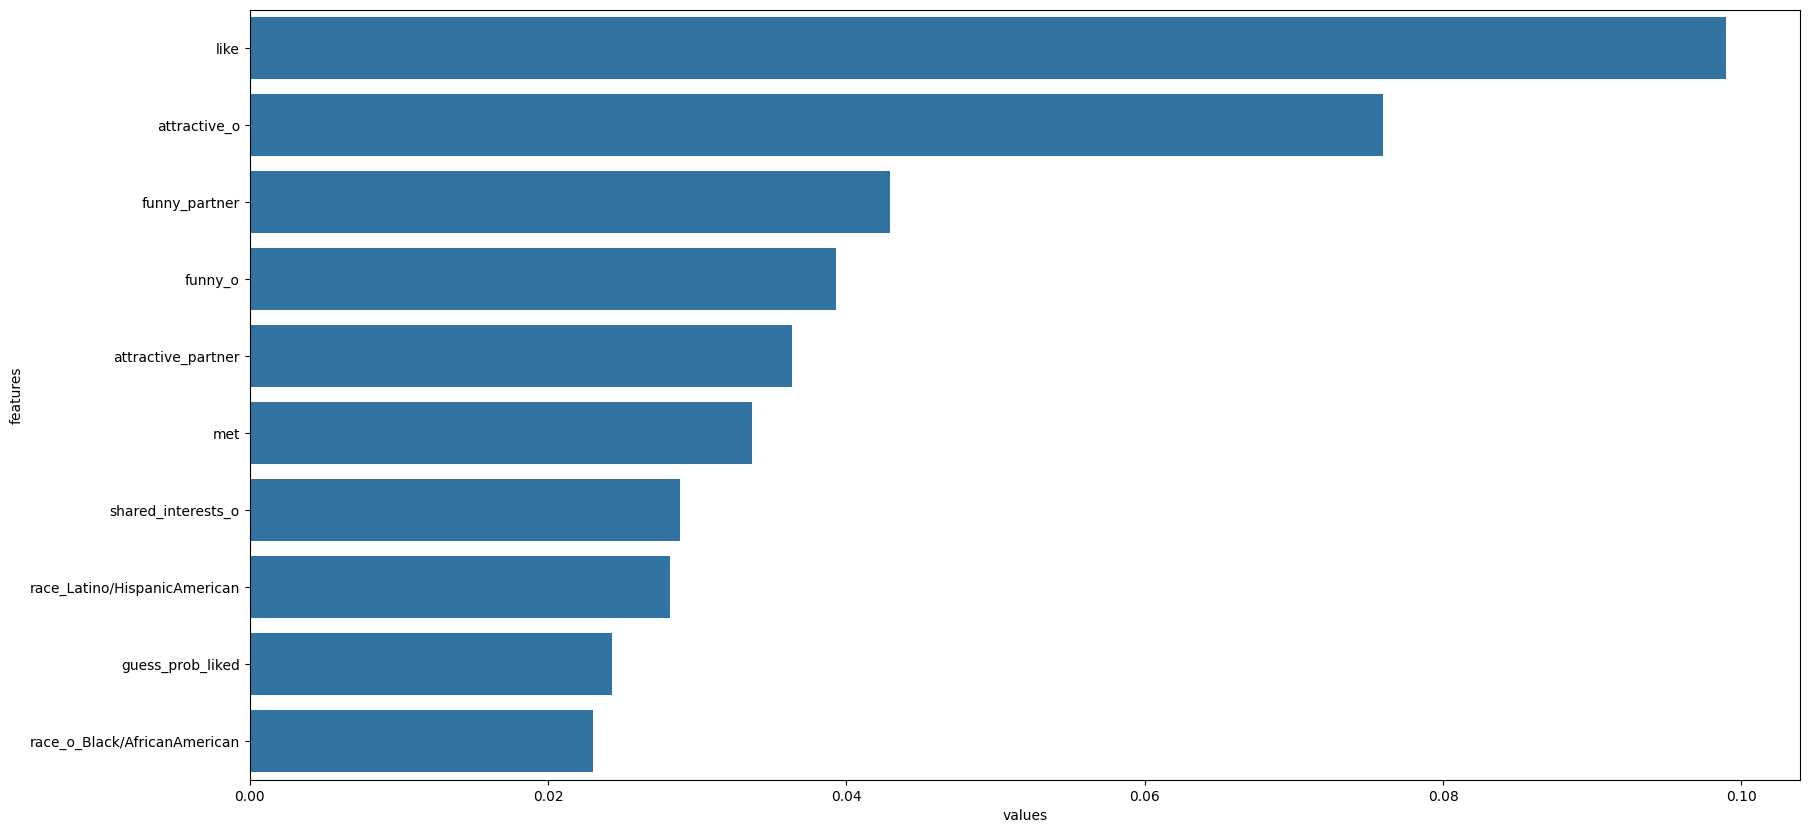

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features', data=feature_imp.sort_values(by='values', ascending=False).head(10))